<a href="https://colab.research.google.com/github/danielrr25/CAP4630_A.I/blob/main/Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Homework

This is the 2nd assignment for CAP 4630 and we will implement logistic regression and apply it to two
different datasets. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)** \
You are **not** allowed to use Machine Learning libaries such as Scikit-learn and Keras.

**Task Overview:**
- Logistic Regression

## 1 - Logistic Regression ##
### 1.1 Packages

Import useful packages for scientific computing and data processing.

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

**Attention:**
1. After this renaming, you will use the new name to call functions. For example, **numpy** will become **np** in the following sections.

In [1]:

# Name: Daniel Rodriguez

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 1.2 - Data Preparation ##

Prepare the data for regression task. **(20 Points)**

**Tasks:**
1. Load data for logistic regression.
2. **Generate the SCATTER PLOT of the data**.

**Hints:**
1. The data file is "data_logistic.csv", which are exam scores for students.
2. The data is organized by column: x1 (exam 1 score), x2 (exam 2 score), and label y (pass 1 or fail 0).
3. Please use different colors for postive(label=1) and negative(label=0) data.
4. An example of scatter plots is shown below.

![](https://drive.google.com/uc?export=view&id=1CPv5s4W8SkUMa_sXCIz-NejSnFj-e1IH)

          x1         x2  label
0  75.013658  30.603263      0
1  55.482161  35.570703      0
2  95.861555  38.225278      0
3  93.114389  38.800670      0
4  56.253817  39.261473      0


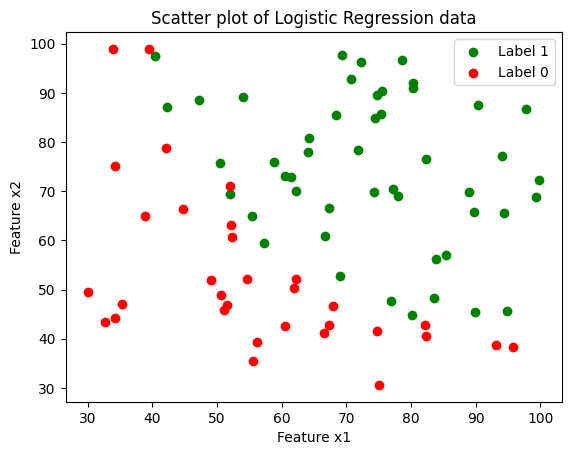

In [4]:
# Load the dataset
data = pd.read_csv('data_logistic.csv')

# Display the first 5 rows of the DataFrame to inspect the data
print(data.head())

# Plotting the data
# Positive examples (label 1)
passed = data[data['label'] == 1]
# Negative examples (label 0)
failed = data[data['label'] == 0]

# Scatter plot for the two classes
plt.scatter(passed['x1'], passed['x2'], color='green', label='Label 1')
plt.scatter(failed['x1'], failed['x2'], color='red', label='Label 0')
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.title('Scatter plot of Logistic Regression data')
plt.legend()
plt.show()

### 1.3 - Sigmoid function ##


Implement sigmoid function so it can be called by the rest of your program. **(20 Points)**

**Tasks:**
1. Implement the sigmoid function (**def sigmoid(z):**).
2. Test the sigmoid function by function **plotting** with test data (X, Y) where Y = sigmoid(X).

**Hints:**  
1. Given the class material, sigmoid function is defined as:
$g(z) = \frac{1}{1+e^{-z}}$.
2. You may consider X = np.linspace(-5, 5, 1000) to plot the curve.
3. Plot Y against X.
4. An example of plot for validation is shown below:

![](https://drive.google.com/uc?export=view&id=18j5oHdw78uVm2WwHsdIb4hwhpXDxR37S)

In [5]:
# Implement sigmoid fuction here
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 2: Generate X values and compute Y values using the sigmoid function
X = np.linspace(-10, 10, 1000)
Y = sigmoid(X)



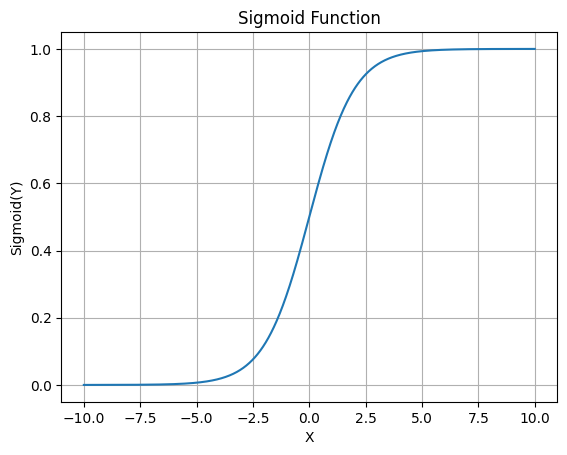

In [6]:
# Plot data here

# Step 3: Plotting
plt.plot(X, Y)
plt.title("Sigmoid Function")
plt.xlabel("X")
plt.ylabel("Sigmoid(Y)")
plt.grid(True)
plt.show()

### 1.4 - Cost function and gradient ##

Implement the cross entropy cost function and its gradient for logistic regression. **(30 Points)**

**Tasks:**
1. Implement the "cal_cost" to compute the cost.
2. Implement the "cal_grad" to compute the gradients.
3. Test "cal_cost" and "cal_grad" with initial values and print out the results.

**Hint:**
1. The cross entropy cost function (J(θ)) in logistic regression is shown below. It involves two terms, including ylog(h) and (1-y)log(1-h) where h is the function of x.

![](https://drive.google.com/uc?export=view&id=1xLhlPFI4wekwuA7lFm7ebRVt0XBZk3e7)

2. The gradient of the cost J(θ) is a vector of the same length as θ where the $j$th element (for $j = 0, 1, . . . , n)$ is defined below. You may do a hand calculation to justify the first order derivative with the term above.

![](https://drive.google.com/uc?export=view&id=1xfA0A0xyRv2L5JZIdedAmEZxZ3DwpOCF)

3. When you implement J(θ), please use eps = 1e-15 to prevent possible "divide by 0 exception" in second term. You may think about the reason.
4. You may consider the below templates for two functions:

    def cal_cost(theta, X, y):

        htheta = ...
        term1 = ...  /* matrix_multiplication(log(htheta), y)
        term2 = ...  /* matrix_multiplication(log(1-htheta+eps), (1-y))
        J = - 1 / m * (term1 + term2)
        
        return cost
        
    
    def cal_grad(theta, X, y):
        
        htheta = ...
        term1 = ... /* matrix_multiplication(transpose(X), (htheta - y))  //you may think about why transpose(x)
        grad = 1 / m * term1
    
        return grad
5. It involves matrix multiplication and you may consider the function of np.matmul or np.dot.   
        
6. Initialize the intercept term (constant term) with **ones** and the theta with **zeros**. Test the functions with these initial values. \
    **Expected outputs:**\
    Cost at initial theta : 0.6931471805599445\
    Gradient at inital theta : [-0.1        -10.91242026 -11.73652937]


In [7]:
# Function to calculate the cost
def cal_cost(theta, X, y):
    m = len(y)
    htheta = sigmoid(np.dot(X, theta))
    eps = 1e-15  # To prevent log(0)
    term1 = np.dot(-y, np.log(htheta + eps))
    term2 = np.dot((1 - y), np.log(1 - htheta + eps))
    J = 1 / m * (term1 - term2)
    return J

# Function to calculate the gradient
def cal_grad(theta, X, y):
    m = len(y)
    htheta = sigmoid(np.dot(X, theta))
    error = htheta - y
    grad = 1 / m * np.dot(X.T, error)
    return grad

# Load data
data_path = 'data_logistic.csv'  # Make sure to use the correct path where your CSV file is located
data = pd.read_csv(data_path)

# Prepare the data
X = data[['x1', 'x2']].values
y = data['label'].values
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept term

# Initialize theta
theta_initial = np.zeros(X.shape[1])

# Compute initial cost and gradient
initial_cost = cal_cost(theta_initial, X, y)
initial_grad = cal_grad(theta_initial, X, y)

print(f"Initial Cost: {initial_cost}")
print(f"Gradient at initial theta: {initial_grad}")

Initial Cost: 0.6931471805599434
Gradient at initial theta: [ -0.1        -10.91242026 -11.73652937]


## 1.5 Train parameters with Gradient Descent ##


Train parameters using Gradient Descent. **(15 Points)**

**Tasks:**
1. Calculate best fit theta by Gradient Descent with learning rate of **0.001 (1e-3)** and epoch of **80K**. The initial theta from above blocks is used as initial values.
2. Print out the best theta (the last one is considered as the best here) and its corresponding cost.
3. **Plot the decision boundary**.

**Hints:**
1. You may take gradient descent in homework 1 as an template.
2. Derive the boundary line from **sigmoid(theta[0]+ X1 * theta[1] + X2* theta[2])=0.5**. Think about why we get the line by setting **the activated probability to 0.5**. Also, try to calculate the final relationship between X1 and X2. When sigmoid(X) = 0.5, what is the value of x? Check the generated plot in 1.3.
3. The validation of first 5 epochs (updated theta and cost): \
------Epoch 0------\
Theta: [0.0001     0.01091242 0.01173653]\
Cost: 0.6996118077359638\
------Epoch 1------\
Theta: [-0.0001129   0.00053949  0.00229352]\
Cost: 0.6649331468590681\
------Epoch 2------\
Theta: [-5.93604956e-05  8.33145873e-03  1.07754324e-02]\
Cost: 0.6679914364992459\
------Epoch 3------\
Theta: [-0.0002356   0.0004607   0.00370829]\
Cost: 0.6545873034874964\
------Epoch 4------\
Theta: [-0.00020363  0.00683227  0.01065138]\
Cost: 0.6563302142684528
4. You may take the plots below as an exmample:

![](https://drive.google.com/uc?export=view&id=1xLg9LrIF888gGXj3zRAG9iJLsyAmgPQg)

5. It may take ~1 min to finish running.

In [8]:
# Gradient Descent Implementation Here
# Initialize parameters
learning_rate = 1e-3
epochs = 80000
theta = theta_initial  # Use theta from the previous step

# Gradient Descent Function
cost_history = []  # to track the cost

for epoch in range(epochs):
    grad = cal_grad(theta, X, y)
    theta = theta - learning_rate * grad
    cost = cal_cost(theta, X, y)
    cost_history.append(cost)

    # Print the validation of first 5 epochs
    if epoch < 5:
        print(f"------Epoch {epoch}------")
        print(f"Theta: {theta}")
        print(f"Cost: {cost}")

# Print the best theta and its cost
print(f"Final Theta: {theta}")
print(f"Final Cost: {cost_history[-1]}")


------Epoch 0------
Theta: [0.0001     0.01091242 0.01173653]
Cost: 0.699611807735963
------Epoch 1------
Theta: [-0.0001129   0.00053949  0.00229352]
Cost: 0.6649331468590671
------Epoch 2------
Theta: [-5.93604956e-05  8.33145873e-03  1.07754324e-02]
Cost: 0.6679914364992452
------Epoch 3------
Theta: [-0.0002356   0.0004607   0.00370829]
Cost: 0.6545873034874954
------Epoch 4------
Theta: [-0.00020363  0.00683227  0.01065138]
Cost: 0.656330214268452
Final Theta: [-3.88329777  0.02947987  0.03935448]
Final Cost: 0.43838894881827734


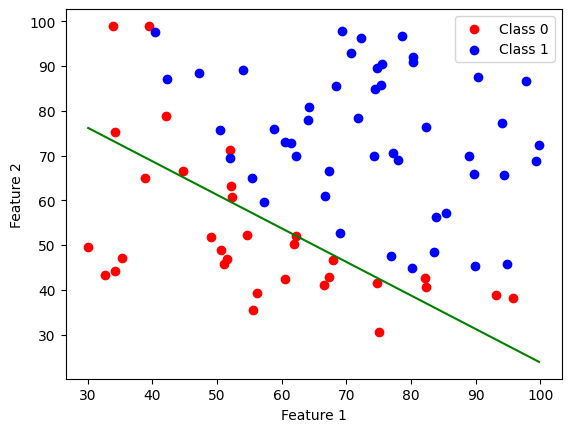

In [ ]:
# Draw Decision Boundary Here

# Plotting the data points
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='blue', label='Class 1')

# Calculating the decision boundary
x_value = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_value = -(theta[0] + theta[1] * x_value) / theta[2]

# Plotting the decision boundary
plt.plot(x_value, y_value, "g")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



### 1.6 Evaluating Logistic Regression

Evaluate the model with given data. **(15 Points)**

**Tasks:**
1. Calculate the training accuracy and **PRINT IT OUT**.
2. Evaluate the predicted probability of the learnt model with x1 = 56 and x2 = 32 and **PRINT IT OUT**.


**Hints:**  
1. Positive(prediction>0.5) and negative(prediction<=0.5).
2. The prediction results are based on acceptance probability. Given the two exam scores, we expected the model yields either high probability of "fail" or low probability of "pass".
3. Training accuracy should be around **85%**.

In [ ]:
# Evaluate the model
# Define the prediction function
def predict(theta, X):
    return sigmoid(np.dot(X, theta)) >= 0.5

# Calculate training accuracy
predictions = predict(theta, X)
accuracy = np.mean(predictions == y) * 100  # Training accuracy
print(f"Training Accuracy: {accuracy:.2f}%")

# Evaluate the predicted probability for a new data point
new_data_point = np.array([1, 56, 32])  # Including the intercept term
predicted_probability = sigmoid(np.dot(new_data_point, theta))
print(f"Predicted probability for x1=56 and x2=32: {predicted_probability:.4f}")


Training Accuracy: 85.00%
Predicted probability for x1=56 and x2=32: 0.2743
